# here graphs of non-spatial nature are produced

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# graphs for all WWTPS

In [2]:
# read non=spatial data for introduction
data=pd.read_excel('final/database.xlsx')
data.year=data.year.astype(int)


In [3]:
mask1=data.year<2077
mask2=data.year>1899
data=data[(mask1 & mask2)]
data.year.min()

1905

# show construction history
## is average meaningful?

In [4]:
data_all=data.groupby(['BL','year']).count().reset_index()
data_all=data_all.pivot('year','BL','PE')
#z['average']=z.mean(axis=1)



Text(0.5, 1.0, 'Temporal Distribution Of WWTPSUp To 500 PEs')

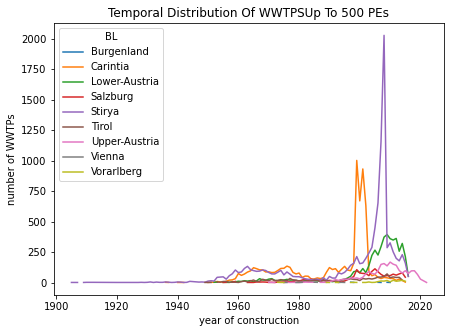

In [5]:
fig, ax= plt.subplots(1, figsize=(7,5))
lines=data_all.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500 '.title()+'PEs')


# show only recent history

In [6]:
mask2=data.year>1993
only_recent=data[(mask2)]
only_recent=only_recent.groupby(['BL','year']).count().reset_index()
only_recent=only_recent.pivot('year','BL','PE')
#z['average']=z.mean(axis=1)

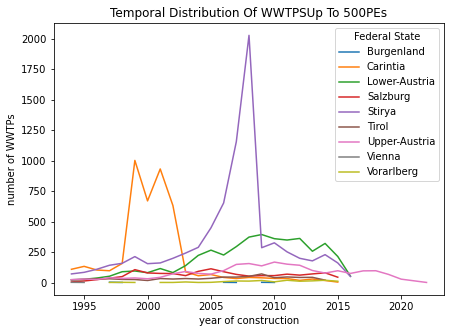

In [7]:
fig, ax= plt.subplots(1, figsize=(7,5))
only_recent.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500'.title()+'PEs')
ax.legend(title='Federal State')

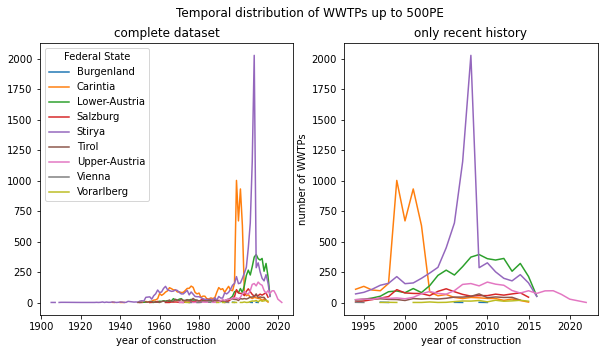

In [8]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
data_all.plot(ax=ax[0])
only_recent.plot(ax=ax[1], legend=False)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
plt.savefig('graphs/temporal.png', bbox_inches='tight' )

In [9]:
data_all

BL,Burgenland,Carintia,Lower-Austria,Salzburg,Stirya,Tirol,Upper-Austria,Vienna,Vorarlberg
year,,,,,,,,,
1905,NaN,NaN,NaN,NaN,1.0,NaN,325.0,NaN,NaN
1906,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1907,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1908,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1909,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN


In [10]:
only_major=data_all.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])
only_recent_major=only_recent.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])

In [11]:
only_major

BL,Carintia,Lower-Austria,Salzburg,Stirya,Tirol,Upper-Austria
year,,,,,,
1905,NaN,NaN,NaN,1.0,NaN,325.0
1906,NaN,NaN,NaN,1.0,NaN,NaN
1907,NaN,NaN,NaN,1.0,NaN,NaN
1908,NaN,1.0,NaN,NaN,NaN,NaN
1909,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,96.0
2018,NaN,NaN,NaN,NaN,NaN,97.0
2019,NaN,NaN,NaN,NaN,NaN,67.0


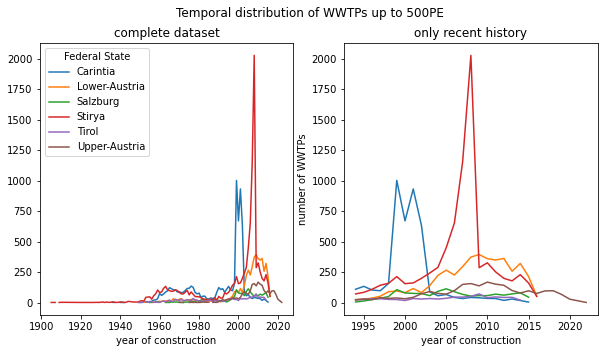

In [12]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
only_major.plot(ax=ax[0])
only_recent_major.plot(ax=ax[1], legend=False)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
plt.savefig('graphs/temporal.png', bbox_inches='tight' )

# by tech_type
## have some data problem: 0s and un-unified categories

# PE workflow

In [13]:
data=gpd.read_file('final/complete.geojson')

In [14]:
data

,id,%PE_nonitri,%before_reg,%no_nitri,BL,GKZ,KG,PE_nonitri,before_reg,freq,mean_year,no_nitri,sum_PE,geometry
0,0,0.000000,0.0,0.0,Stirya,61425,Feistritz,0.0,0,1,2008,0,6.0,"POLYGON ((14.14081 47.17795, 14.14088 47.17862..."
1,1,0.000000,0.0,0.0,Stirya,61708,Völlegg,0.0,0,16,2007,0,192.0,"POLYGON ((15.58239 47.41321, 15.58229 47.41347..."
2,2,0.000000,0.0,0.0,Stirya,61055,Hart,0.0,0,1,2002,0,12.0,"POLYGON ((15.55413 46.86375, 15.55396 46.86429..."
3,3,0.000000,0.0,0.0,Stirya,62279,Arzberg,0.0,0,1,2009,0,10.0,"POLYGON ((15.80463 47.46098, 15.80484 47.46097..."
4,4,100.000000,100.0,100.0,Stirya,62272,Kaindorf,50.0,3,3,1962,3,50.0,"POLYGON ((15.90559 47.21368, 15.90552 47.21365..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391,652,0.000000,0.0,0.0,Upper-Austria,41120,St. Georgen an der Gusen,0.0,0,1,2011,0,6.0,"POLYGON ((14.46054 48.28146, 14.46051 48.28150..."
4392,653,0.000000,0.0,0.0,Upper-Austria,40405,Hartberg,0.0,0,1,2001,0,5.0,"POLYGON ((13.06397 48.14910, 13.06396 48.14909..."
4393,654,0.000000,0.0,0.0,Upper-Austria,40710,Kampesberg,0.0,0,2,2009,0,46.0,"POLYGON ((13.89386 47.95186, 13.89373 47.95200..."
4394,655,54.545455,0.0,50.0,Upper-Austria,41212,Kramberg,6.0,0,2,2003,1,11.0,"POLYGON ((13.47897 48.30079, 13.47884 48.30081..."


In [15]:
#PE workflow
data_BL=data.groupby('BL').sum().reset_index()[['BL','PE_nonitri','sum_PE','no_nitri','freq']]
data_BL['%BL_PE_nonitri']=data_BL.PE_nonitri/data_BL.sum_PE*100
#number of infra workflow
data_BL['%BL_nonitri']=data_BL.no_nitri/data_BL.freq*100

In [16]:
data_BL

,BL,PE_nonitri,sum_PE,no_nitri,freq,%BL_PE_nonitri,%BL_nonitri
0,Carintia,39658.733333,97832.559817,2335,7052,40.537356,33.111174
1,Lower-Austria,8625.000000,124026.000000,380,4313,6.954187,8.810573
2,Salzburg,4312.000000,30336.960000,308,1708,14.213685,18.032787
3,Stirya,15498.000000,84977.000000,2103,10173,18.237876,20.672368
4,Tirol,8348.733333,32385.226667,709,1294,25.779450,54.791345
5,Upper-Austria,2889.000000,48172.000000,368,2633,5.997260,13.976453


### number of WWTPS

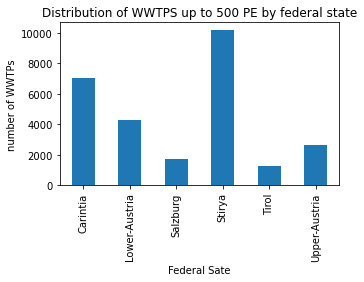

In [17]:
#number of infra
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y=['freq'], ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('Federal Sate')
ax.set_title('distribution of'.capitalize() +' WWTPS'+' up to 500'+' PE'+' by federal state')
ax.get_legend().remove()
plt.savefig('graphs/freq_BL.png', bbox_inches='tight')



### number of PEs

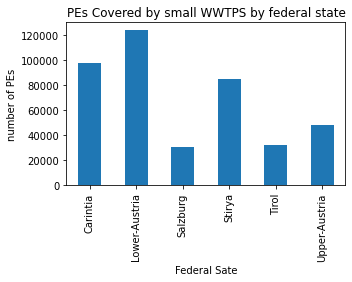

In [18]:
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y='sum_PE', ax=ax)
plt.ylabel('number of PEs')
plt.xlabel('Federal Sate')
ax.set_title('PEs '+ 'covered by small'.capitalize() +' WWTPS by federal state')
ax.get_legend().remove()
plt.savefig('graphs/PE_sum_BL.png', bbox_inches='tight')


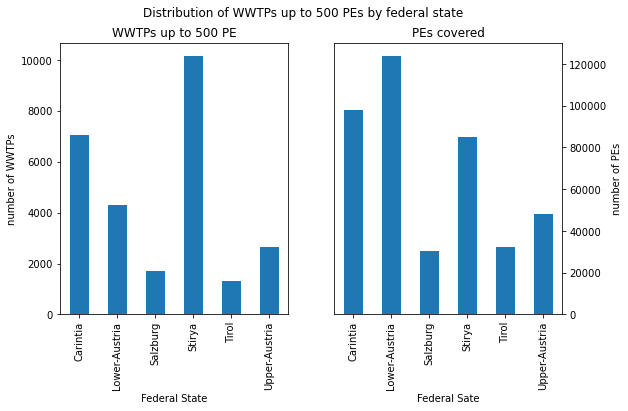

In [19]:
fig, ax= plt.subplots(1,2, figsize=(9,5))
data_BL.plot.bar(x='BL',y='sum_PE', ax=ax[1])
ax[1].set_ylabel('number of PEs')
ax[1].set_xlabel('Federal Sate')
ax[1].set_title('PEs '+ 'covered')
ax[1].get_legend().remove()
fig.suptitle('Distribution of WWTPs up to 500 PEs by federal state')
data_BL.plot.bar(x='BL',y=['freq'], ax=ax[0])
ax[0].set_ylabel('number of WWTPs')
ax[0].set_xlabel('Federal State')
ax[0].set_title('WWTPs'+' up to 500'+' PE')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[0].get_legend().remove()
plt.savefig('graphs/freq_BL+sum_PE.png', bbox_inches='tight')



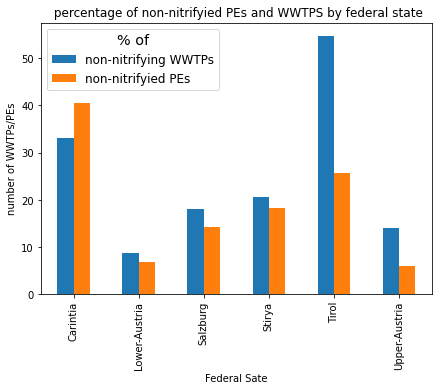

In [20]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot.bar(x='BL', y=['%BL_nonitri','%BL_PE_nonitri'],ax=ax)
plt.ylabel('number of WWTPs/PEs')
plt.xlabel('Federal Sate')
ax.set_title(' Percentage of Non-nitrifyied'.capitalize() +' PEs and WWTPS by federal state')
ax.legend(['non-nitrifying WWTPs','non-nitrifyied PEs'], title='% of', title_fontsize='x-large', fontsize='large')
plt.savefig('graphs/%nonitri+%PE_nonitri_BL.png', bbox_inches='tight')



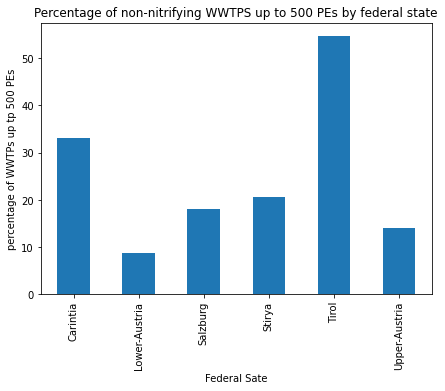

In [21]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot.bar(x='BL', y=['%BL_nonitri'],ax=ax)
plt.ylabel('percentage of WWTPs up tp 500 PEs')
plt.xlabel('Federal Sate')
ax.set_title('percentage of non-nitrifying'.capitalize() +' WWTPS up to 500 PEs by federal state')
ax.legend(['non-nitrifying WWTPs'], title='% of ', title_fontsize='x-large', fontsize='large')
ax.get_legend().remove()

plt.savefig('graphs/%nonitri.png', bbox_inches='tight')

# get population

In [22]:
#aadding POP variable 
pop=pd.read_excel('DATA/einwohnerzahl_nach_ortschaften_1.1.2021_gebietsstand_1.1.2021.xlsx', header=1)
pop.rename(columns={'Ortschaftsname':'KG','Gemeindename':'PG','Bundesland':'BL','Bevölkerung\nam 1.1.2021':'Pop'},inplace=True)
#merge on BL
pop=pop.groupby('BL').sum().reset_index()
pop.drop(index=4,inplace=True)
pop=pop[['BL','Pop']]
#rename BLS
pop.replace({'Oberösterreich':'Upper-Austria','Steiermark':'Stirya','Niederösterreich':'Lower-Austria','Tirol':'Tirol','Kärnten':'Carintia',}, inplace=True)
BL=data.groupby('BL').sum().reset_index()
pop_BL=pd.merge(BL,pop,on='BL')
pop_BL['Pop_coverage']=pop_BL.sum_PE/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri']=pop_BL.PE_nonitri/pop_BL.Pop*100




In [23]:
austria_complete=pop_BL.append(pop).drop_duplicates(subset='Pop')
national_coverage=austria_complete.sum_PE.sum()/austria_complete.Pop.sum()*100
national_coverage_nonitri=austria_complete.PE_nonitri.sum()/austria_complete.Pop.sum()*100
national={'BL':'Austria','Pop_coverage':national_coverage,'Pop_coverage_no_nitri':national_coverage_nonitri}
pop_BL=pop_BL.append(national,ignore_index=True)

In [24]:
pop_BL

,BL,%PE_nonitri,%before_reg,%no_nitri,GKZ,PE_nonitri,before_reg,freq,mean_year,no_nitri,sum_PE,Pop,Pop_coverage,Pop_coverage_no_nitri
0,Carintia,21577.956706,24978.283457,22053.547821,13906191.0,39658.733333,2577.0,7052.0,1338321.0,2335.0,97832.559817,562089.0,17.405172,7.055597
1,Lower-Austria,11460.041745,19316.379513,11662.872493,40170236.0,8625.000000,551.0,4313.0,2544418.0,380.0,124026.000000,1690879.0,7.335001,0.510090
2,Salzburg,4447.797708,346.007969,5554.005042,14468651.0,4312.000000,15.0,1708.0,572299.0,308.0,30336.960000,560710.0,5.410455,0.769025
3,Stirya,22920.534970,33273.464291,30728.417298,76257947.0,15498.000000,2294.0,10173.0,2476407.0,2103.0,84977.000000,1247077.0,6.814094,1.242746
4,Tirol,8509.671424,11409.906950,14261.520052,18845149.0,8348.733333,533.0,1294.0,531659.0,709.0,32385.226667,760105.0,4.260625,1.098366
5,Upper-Austria,7172.474979,8908.741933,8458.990129,27021586.0,2889.000000,381.0,2633.0,1311567.0,368.0,48172.000000,1495608.0,3.220897,0.193166
6,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.676430,0.888105


# pop coverage

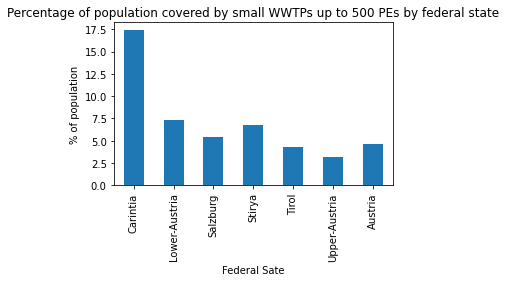

In [25]:
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot.bar(x='BL',y='Pop_coverage',ax=ax)
plt.ylabel('% of population')
plt.xlabel('Federal Sate')
ax.set_title('Percentage of population covered by small'.capitalize() +' WWTPs up to 500 PEs by federal state')
ax.get_legend().remove()
plt.savefig('graphs/%pop_BL.png', bbox_inches='tight')



# pop coverage no nitri


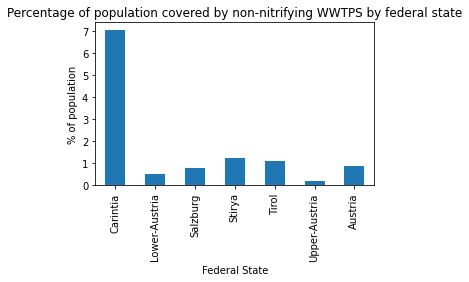

In [26]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot.bar(x='BL',y='Pop_coverage_no_nitri',ax=ax)
plt.ylabel('% of population')
plt.xlabel('Federal State')
ax.set_title('percentage of population covered by non-nitrifying'.capitalize() +' WWTPS by federal state')
ax.get_legend().remove()
plt.savefig('graphs/%popnonitri_BL.png', bbox_inches='tight')


# graphs of unified dataset VS original Gunter
### freq, tech_type, PE

In [27]:
#control=pd.read_excel('DATA/control_gunter.xlsx')
